# Info about dataset:
- Housing in Ames and Iowa

# Exam
- Why is topic important?
- Previous work, what are we doing different?
- Goal of our work
    - Specify what differentiate us
    - In what degree does basement and balcony affect the price, and is it a good predictor of future prices?
    - Which features are good predictor of price?
    - What regession techniques predicts housing prices the best?
    - etcetc
    - How can creative feature engineering enchance our result?
- Why is machinelearning is usefull for this?
- Data from Kaggle 
    - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
    - train.csv as training set
    - test.csv as test set
    - data_description.txt as description of columns
    - sample_submission as a benchmark submission from a linear regression on year and month of sale, lot square footage and number of bedrooms
    - Is it benefitial for a "builder" to add a basement or balcony?
    - Does the type of poarch matter for sales value?
- Categorize and visualize on a map or with statistics
- describe each each statistic or quantitative method 
- Why did we focus on the features we did?
- Dont jump to much to conclution
- State what ML algo we used and what parameters
- Test different algos and parameters before deciding
    - Then we can describe in more detail why we did as we did
    
- summarize the findings
- Why is these finding important?
- How can a business/government use these finding to gain knowledge?
- Is the result sufficient to provide reccomendation?
- Inform about any limitations to the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load Data

In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Exploratory Data Analysis 
-  perform EDA to understand your data better

In [13]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Feature Engineering
- Made a variable for total square feet
- Binary variables for HasBAlcony and HasBasement
- Find out what variables i need, and what should be binary

In [16]:

# Total Square Feet
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

# Has Balcony (assuming binary 0 or 1)
train_data['HasBalcony'] = ((train_data['WoodDeckSF'] + train_data['OpenPorchSF'] + 
                              train_data['EnclosedPorch'] + train_data['3SsnPorch'] + 
                              train_data['ScreenPorch']) > 0).astype(int)

# Has Basement (assuming binary 0 or 1)
train_data['HasBasement'] = (train_data['TotalBsmtSF'] > 0).astype(int)


## Data Visualization

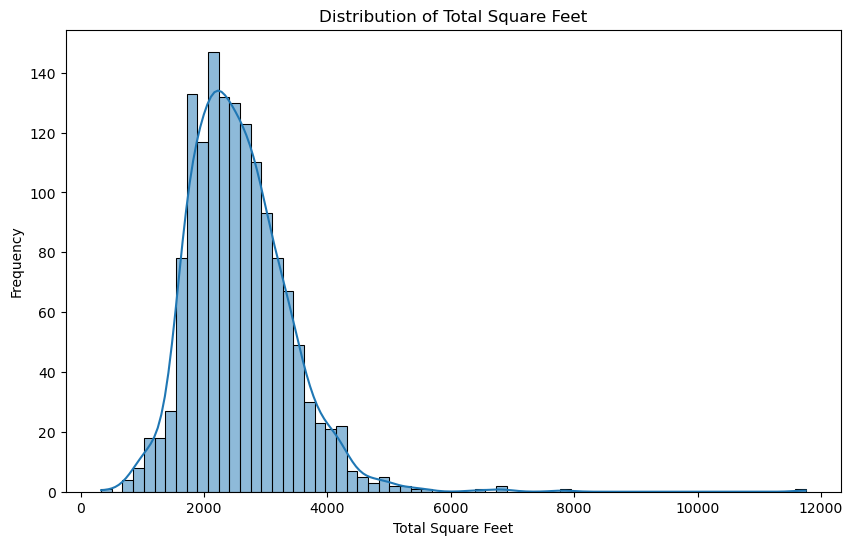

In [17]:
# Histogram of TotalSF
plt.figure(figsize=(10, 6))
sns.histplot(train_data['TotalSF'], kde=True)
plt.title('Distribution of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()




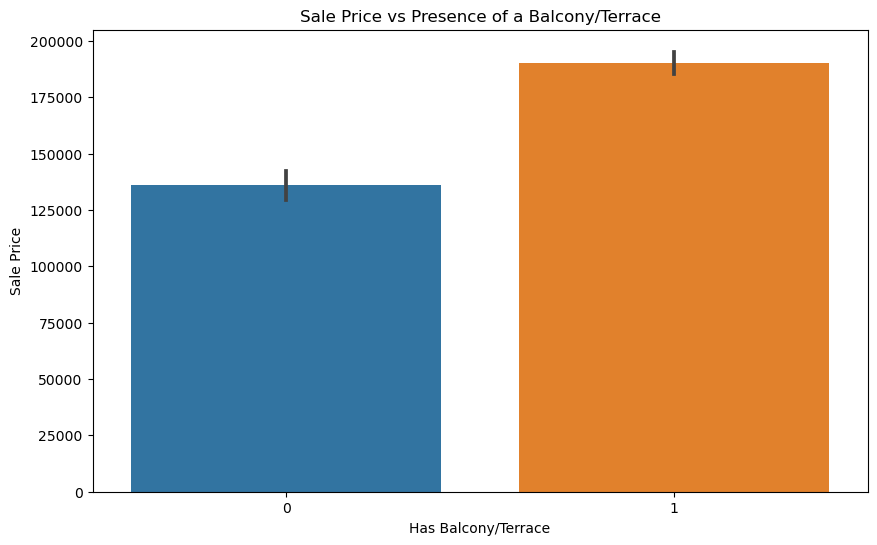

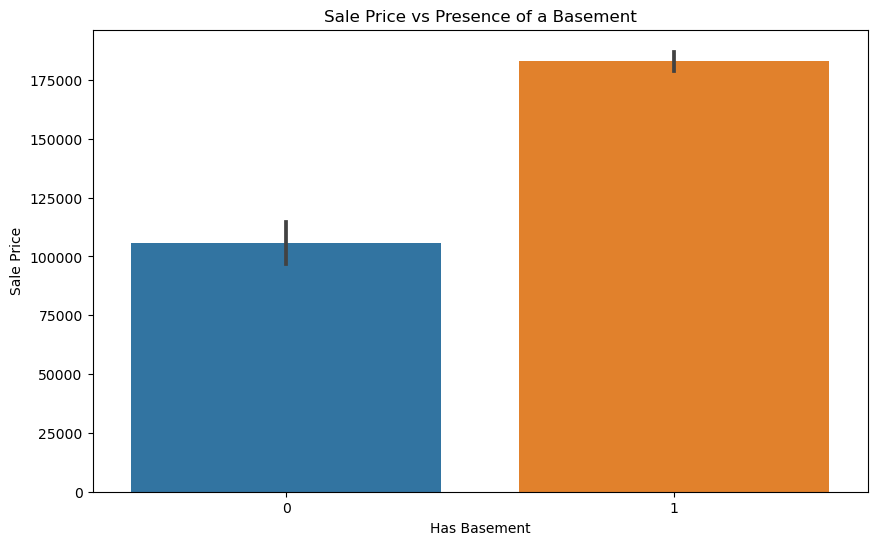

In [18]:
# Bar plot for presence of a balcony
plt.figure(figsize=(10, 6))
sns.barplot(x=train_data['HasBalcony'], y=train_data['SalePrice'])
plt.title('Sale Price vs Presence of a Balcony/Terrace')
plt.xlabel('Has Balcony/Terrace')
plt.ylabel('Sale Price')
plt.show()

# Bar plot for presence of a basement
plt.figure(figsize=(10, 6))
sns.barplot(x=train_data['HasBasement'], y=train_data['SalePrice'])
plt.title('Sale Price vs Presence of a Basement')
plt.xlabel('Has Basement')
plt.ylabel('Sale Price')
plt.show()

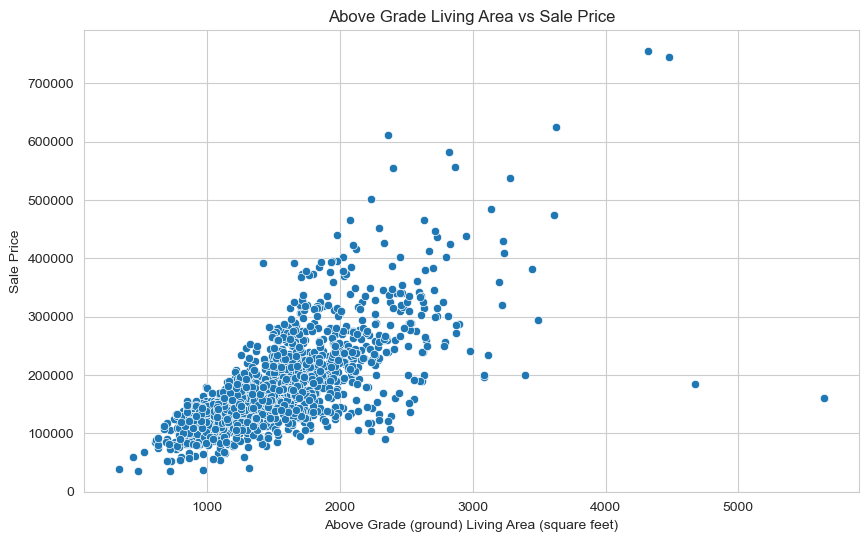

In [54]:
# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('Above Grade Living Area vs Sale Price')
plt.xlabel('Above Grade (ground) Living Area (square feet)')
plt.ylabel('Sale Price')
plt.show()


## Correlation Analysis 

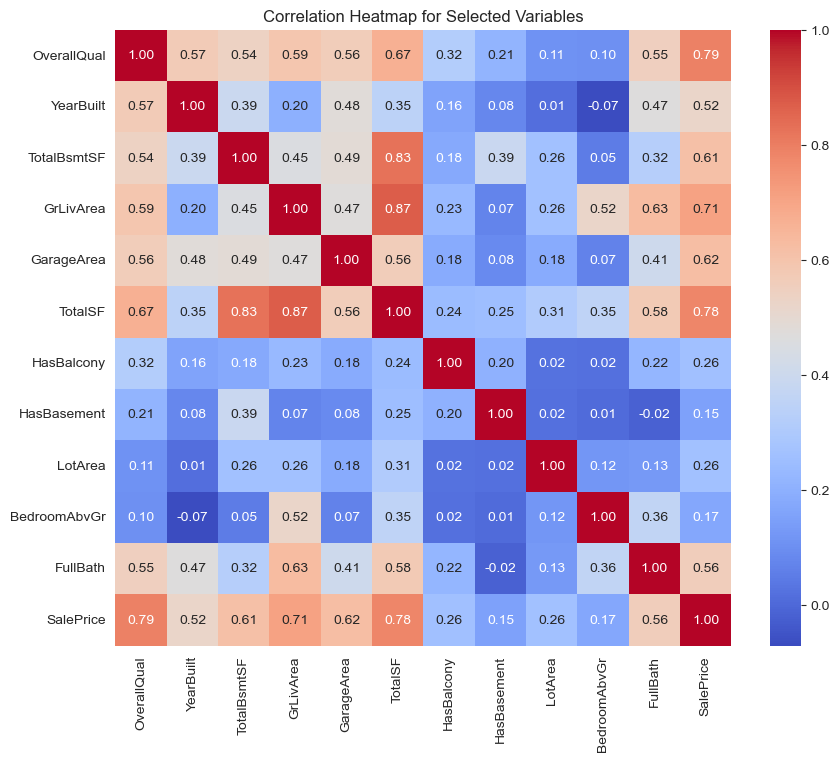

In [57]:
# List of variables you're interested in
variables_of_interest = [
    'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 
    'GarageArea', 'TotalSF', 'HasBalcony', 'HasBasement', 
    'LotArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'
]

# Calculate the correlation matrix for the variables of interest
corr_matrix_subset = train_data[variables_of_interest].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_subset, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()


## Outlier Detection and Treatment

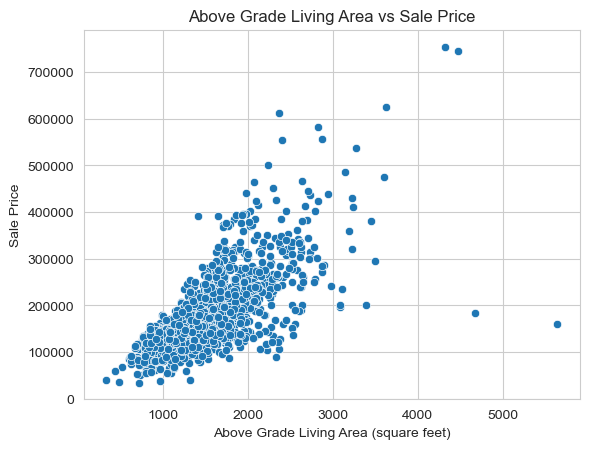

In [58]:
# Scatter plot for 'GrLivArea' vs 'SalePrice'
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('Above Grade Living Area vs Sale Price')
plt.xlabel('Above Grade Living Area (square feet)')
plt.ylabel('Sale Price')
plt.show()

# Similarly, do this for 'TotalBsmtSF', 'TotalSF', and other numerical features


In [59]:
# Define an upper limit for 'GrLivArea' to remove extreme outliers
upper_limit = train_data['GrLivArea'].quantile(0.99)
train_data = train_data[train_data['GrLivArea'] < upper_limit]


## Data Preprocessing 
- Handle missing values, encode categorical variables, and possibly feature scale your data:

In [45]:
# Example for handling missing values
train_data.fillna(train_data.mean(), inplace=True)

# Example for encoding categorical variables
train_data = pd.get_dummies(train_data)


## Split the Data
- Divide your training data into features and target variable, and then into training and validation sets:

In [46]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
- Train a regression model using the training set:

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
- Evaluate your model using the validation set:

In [48]:
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)
rmse = mse ** 0.5

## Model Optimization
- Optimize your model by tuning hyperparameters or trying different regression algorithms.

## Results/predictions


In [49]:
final_predictions = model.predict(test_data)
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': final_predictions})
submission.to_csv('submission.csv', index=False)


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Alley
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- ...
Feature names seen at fit time, yet now missing:
- Alley_Grvl
- Alley_Pave
- BldgType_1Fam
- BldgType_2fmCon
- BldgType_Duplex
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'RH'